##*Elizabeth Torres Torrecillas* 

# *Actividad 4*



---

---

---







* **Actividad 1**
>Se resumen las funciones aplicadas al DataFrame inicial y se crea uno nuevo para continuar con nuestro trabajo. Sintetizando las características principales del conjunto de datos que estamos analizando.

In [71]:
#importar bibliotecas a utilizar
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [72]:
#La biblioteca Matplotlib mostrará los resultados en la Notebook de Jupyter
%matplotlib inline

In [73]:
#Guardamos el archivo .txt que subimos a Github en la variable url
url='https://raw.githubusercontent.com/elizabethtorrest/Fisica-Computacional/F%C3%ADsica-Computacional/Actividad4/Climatologia%20Imuris%20Sonora.txt'

# Definimos los nombres de las columnas
type_data = ['Fecha', 'Precip', 'Evap', 'Tmax', 'Tmin']

#leemos el archivo .txt que subimos a github y lo convertimos a csv
df_dist=pd.read_csv(url, names=type_data, encoding='cp1251', sep='\s+', header=None, skiprows=19, skipfooter=1, engine='python')

#Hacemos una copia del trabajo y preservamos el dataframe original
df_work0 = df_dist.copy()

# Reemplazamos los textos 'Nulo' por espacio en blanco ''
str_Nulo = 'Nulo'
df_work1 = df_work0.replace(to_replace=str_Nulo, value='', regex=True)

#Convertimos los valores de las variables ambientales a números flotantes
inf_met = ['Precip', 'Evap', 'Tmax', 'Tmin']
for inf in inf_met:
  df_work1[inf] = pd.to_numeric(df_work1[inf], errors='coerce')

#Definimos un nuevo DataFrame por si hay que regresarse.
df_work2 = df_work1.copy()

#Aquí vamos a convertir del tipo objeto a el formato que el lenguaje utilizado comprende
#Esto ya que la variable tipo fecha de Python, contiene mucha información condensada
#La función pd.to_datetime convierte una cadena en tipo datetime64[ns]
# Agregamos la opción de que el primer dato es el día (dayfirst=True) 
df_work2['Fecha'] = pd.to_datetime(df_work2['Fecha'], dayfirst=True). copy()

#Formato de año
df_work2['Año'] = df_work2['Fecha'].dt.year
#Formato de mes
df_work2['Mes'] = df_work2['Fecha'].dt.month

#Definimos un nuevo DataFrame para el análisis de los datos meteorológicos
df_meteo = df_work2.copy()
df_meteo.info()
print(df_meteo.head())
print(df_meteo.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12139 entries, 0 to 12138
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   12139 non-null  datetime64[ns]
 1   Precip  12134 non-null  float64       
 2   Evap    0 non-null      float64       
 3   Tmax    11972 non-null  float64       
 4   Tmin    11979 non-null  float64       
 5   Año     12139 non-null  int64         
 6   Mes     12139 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 664.0 KB
       Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
0 1981-01-01     0.0   NaN  27.0   5.0  1981    1
1 1981-01-02     0.0   NaN  25.0   5.0  1981    1
2 1981-01-03     0.0   NaN  26.0   6.0  1981    1
3 1981-01-04     0.0   NaN  22.5   7.0  1981    1
4 1981-01-05     0.0   NaN  22.5   6.0  1981    1
           Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
12134 2016-04-26     0.0   NaN  28.0   5.0  2016    4
12135 2016-04-27 

###Convertimos la columna de "Mes" a una cadena de caracteres (variable categórica), esto nos ayudará a llevar un orden como es el conocido y no por número enteros del 1 a 12. 
> Esto con ayuda de la función .dt.strftime('%b'), %b representa los meses en formato abreviado y en inglés.




In [78]:
# Eliminaremos la columna de Mes (numérico) y crearemos una nueva de Mes (caracteres)
df_meteo.drop('Mes', axis=1, inplace=True)
df_meteo['Mes'] = df_meteo['Fecha'].dt.strftime('%b')
df_meteo.info()
print(df_meteo.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12139 entries, 0 to 12138
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   12139 non-null  datetime64[ns]
 1   Precip  12134 non-null  float64       
 2   Evap    0 non-null      float64       
 3   Tmax    11972 non-null  float64       
 4   Tmin    11979 non-null  float64       
 5   Año     12139 non-null  int64         
 6   Mes     12139 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 664.0+ KB
       Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
0 1981-01-01     0.0   NaN  27.0   5.0  1981  Jan
1 1981-01-02     0.0   NaN  25.0   5.0  1981  Jan
2 1981-01-03     0.0   NaN  26.0   6.0  1981  Jan
3 1981-01-04     0.0   NaN  22.5   7.0  1981  Jan
4 1981-01-05     0.0   NaN  22.5   6.0  1981  Jan


* **Actividad 2**
> Creamos un histograma para cada variable, siendo estas la Precipitación, Evaporación, Temperaturas Máxima y Mínima. Complementando, con gráficas de la función de densidad de la probabilidad correspondiente.

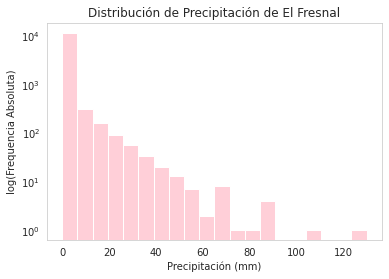

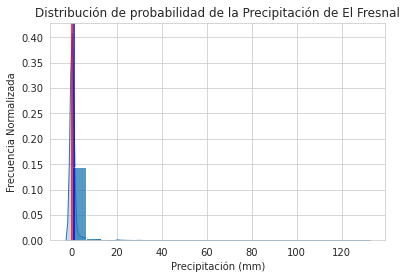

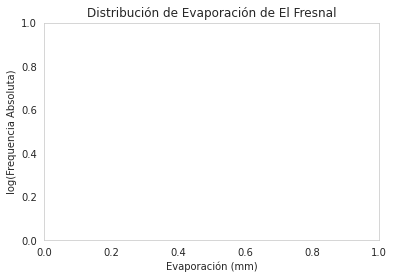

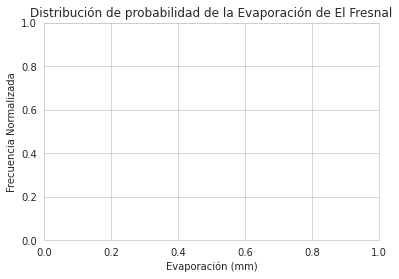

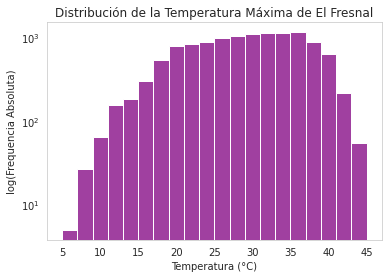

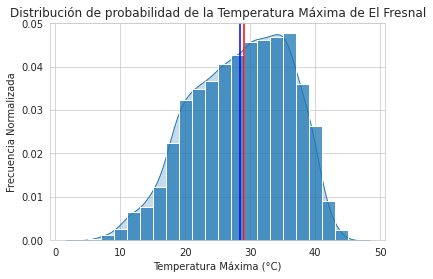

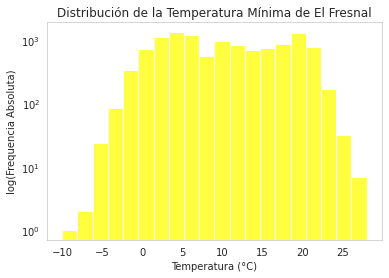

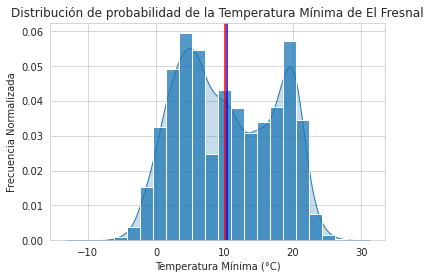

In [79]:
#Para realizar los Histogramas, haremos uso de la función de Seaborn sns.histplot()
#Para realizar las gráficas de la función de densidad de la probabilidad, haremos uso de la función de Seaborn sns.kdeplot()

#Histograma de la variable Precipitación
sns.set_style("whitegrid")
plt.xlabel('Precipitación (mm)')
plt.ylabel('log(Frequencia Absoluta)')
plt.title('Distribución de Precipitación de El Fresnal')
sns.histplot(data=df_meteo, x='Precip', bins=20, log_scale=(False,True),color="pink");
plt.grid()
plt.show()

#Gráfica de función de densidad de la probabilidad de la variable Precipitación
#Definimos las cantidades específicas: Promedio y Mediana
PrecipMed = df_meteo.Precip.median() 
PrecipProm = df_meteo.Precip.mean()
sns.set_style("whitegrid")
#Decimos que graficaremos con Seaborn los datos en la variable Precip
sns.kdeplot(df_meteo.Precip, fill=True);
#Indicamos que se graficará la función de densidad de la probabilidad de Precip
sns.histplot(data=df_meteo, x='Precip', bins=20, stat='density');
#Asignamos color rojo a la mediana de la variable Precip
plt.axvline(PrecipMed, color = 'r'); 
#Asignamos color azul al promedio de la variable Precip
plt.axvline(PrecipProm, color = 'b');
plt.xlabel('Precipitación (mm)')
plt.ylabel('Frecuencia Normalizada')
plt.title('Distribución de probabilidad de la Precipitación de El Fresnal')
plt.show()


####


#NO TENEMOS DATOS DE EVAPORACIÓN, ENTONCES LA GRÁFICA ESTÁ EN BLANCO.
#Histograma de la variable Evaporación
sns.set_style("whitegrid")
plt.xlabel('Evaporación (mm)')
plt.ylabel('log(Frequencia Absoluta)')
plt.title('Distribución de Evaporación de El Fresnal')
sns.histplot(data=df_meteo, x='Evap', bins=20, log_scale=(False,True),color="orange");
plt.grid()
plt.show()

#NO TENEMOS DATOS DE EVAPORACIÓN, ENTONCES LA GRÁFICA ESTÁ EN BLANCO.
#Gráfica de función de densidad de la probabilidad de la variable Evaporación
#Definimos las cantidades específicas: Promedio y Mediana
EvapMed = df_meteo.Evap.median() 
EvapProm = df_meteo.Evap.mean()
sns.set_style("whitegrid")
#Decimos que graficaremos con Seaborn los datos en la variable Evap
sns.kdeplot(df_meteo.Evap, fill=True);
#Indicamos que se graficará la función de densidad de la probabilidad de Evap
sns.histplot(data=df_meteo, x='Evap', bins=20, stat='density');
#Asignamos color rojo a la mediana de la variable Evap
plt.axvline(EvapMed, color = 'r'); 
#Asignamos color azul al promedio de la variable Evap
plt.axvline(EvapProm, color = 'b');
plt.xlabel('Evaporación (mm)')
plt.ylabel('Frecuencia Normalizada')
plt.title('Distribución de probabilidad de la Evaporación de El Fresnal')
plt.show()


#####


#Histograma de la variable Temperatura Máxima 
sns.set_style("whitegrid")
plt.xlabel('Temperatura (°C)')
plt.ylabel('log(Frequencia Absoluta)')
plt.title('Distribución de la Temperatura Máxima de El Fresnal')
sns.histplot(data=df_meteo, x='Tmax', bins=20, log_scale=(False,True),color="purple");
plt.grid()
plt.show()

#Gráfica de función de densidad de la probabilidad de la variable Temperatura Máxima
#Definimos las cantidades específicas: Promedio y Mediana
TmaxMed = df_meteo.Tmax.median() 
TmaxProm = df_meteo.Tmax.mean()
sns.set_style("whitegrid")
#Decimos que graficaremos con Seaborn los datos en la variable Tmax
sns.kdeplot(df_meteo.Tmax, fill=True);
#Indicamos que se graficará la función de densidad de la probabilidad de Tmax
sns.histplot(data=df_meteo, x='Tmax', bins=20, stat='density');
#Asignamos color rojo a la mediana de la variable Tmax
plt.axvline(TmaxMed, color = 'r'); 
#Asignamos color azul al promedio de la variable Tmax
plt.axvline(TmaxProm, color = 'b');
plt.xlabel('Temperatura Máxima (°C)')
plt.ylabel('Frecuencia Normalizada')
plt.title('Distribución de probabilidad de la Temperatura Máxima de El Fresnal')
plt.show()


#####


#Histograma de la variable Temperatura Mínima
sns.set_style("whitegrid")
plt.xlabel('Temperatura (°C)')
plt.ylabel('log(Frequencia Absoluta)')
plt.title('Distribución de la Temperatura Mínima de El Fresnal')
sns.histplot(data=df_meteo, x='Tmin', bins=20, log_scale=(False,True),color="yellow");
plt.grid()
plt.show()

#Gráfica de función de densidad de la probabilidad de la variable Temperatura Mínima
#Definimos las cantidades específicas: Promedio y Mediana
TminMed = df_meteo.Tmin.median() 
TminProm = df_meteo.Tmin.mean()
sns.set_style("whitegrid")
#Decimos que graficaremos con Seaborn los datos en la variable Tmin
sns.kdeplot(df_meteo.Tmin, fill=True);
#Indicamos que se graficará la función de densidad de la probabilidad de Tmin
sns.histplot(data=df_meteo, x='Tmin', bins=20, stat='density');
#Asignamos color rojo a la mediana de la variable Tmin
plt.axvline(TminMed, color = 'r'); 
#Asignamos color azul al promedio de la variable Tmin
plt.axvline(TminProm, color = 'b');
plt.xlabel('Temperatura Mínima (°C)')
plt.ylabel('Frecuencia Normalizada')
plt.title('Distribución de probabilidad de la Temperatura Mínima de El Fresnal')
plt.show()

* **Actividad 3**
> Creamos gráficas de cajas para las variables Evaporación, Temperaturas Máxima y Mínima

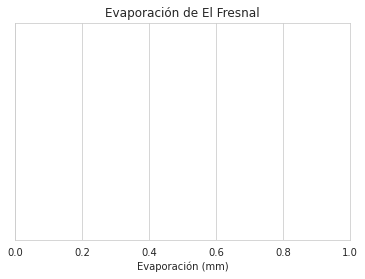

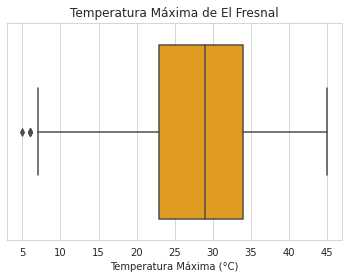

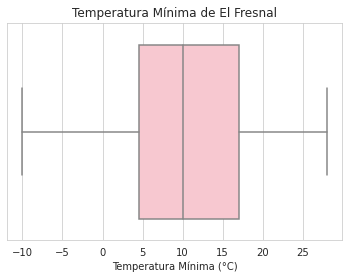

In [80]:
#Para realizar las gráficas de caja, haremos uso de la función de Seaborn sns.boxplot()

#NO HAY REGISTRO DE LOS DATOS DE EVAPORACIÓN, POR LO QUE LA GRÁFICA APARECERÁ EN BLANCO
#Gráfica de caja para la variable Evaporación
sns.set_style("whitegrid")
sns.boxplot(x=df_meteo.Evap, data=df_meteo, orient='h',color="blue").set(xlabel='Evaporación (mm)', title='Evaporación de El Fresnal');
plt.show()

#Gráfica de caja para la variable Temperatura Máxima
sns.set_style("whitegrid")
sns.boxplot(x=df_meteo.Tmax, data=df_meteo, orient='h',color="orange").set(xlabel='Temperatura Máxima (°C)', title='Temperatura Máxima de El Fresnal');
plt.show()

#Gráfica de caja para la variable Temperatura Mínima
sns.set_style("whitegrid")
sns.boxplot(x=df_meteo.Tmin, data=df_meteo, orient='h',color="pink").set(xlabel='Temperatura Mínima (°C)', title='Temperatura Mínima de El Fresnal');
plt.show()

* **Actividad 4**
>  Creamos las gráficas de barras para la variable Precipitación, agrupado ello por Años y después por meses.


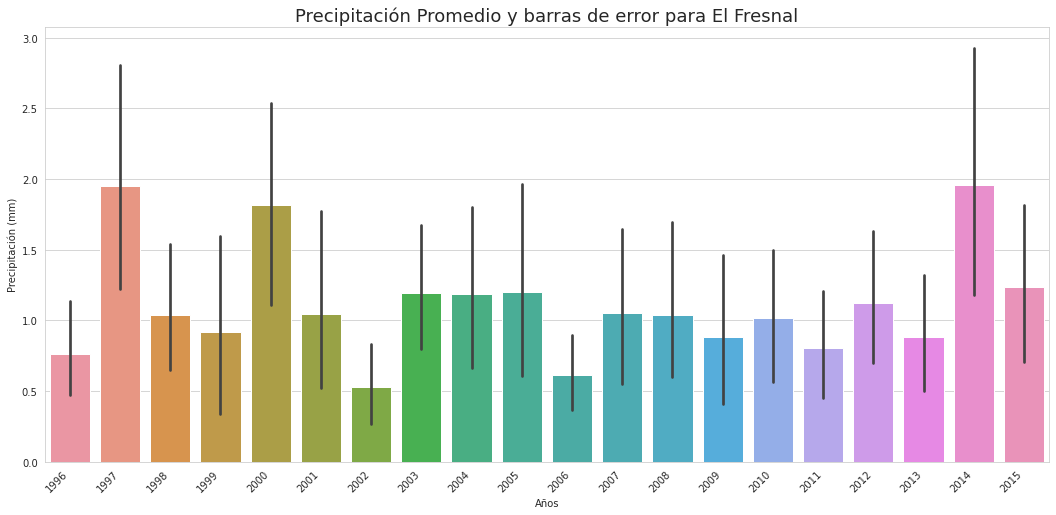

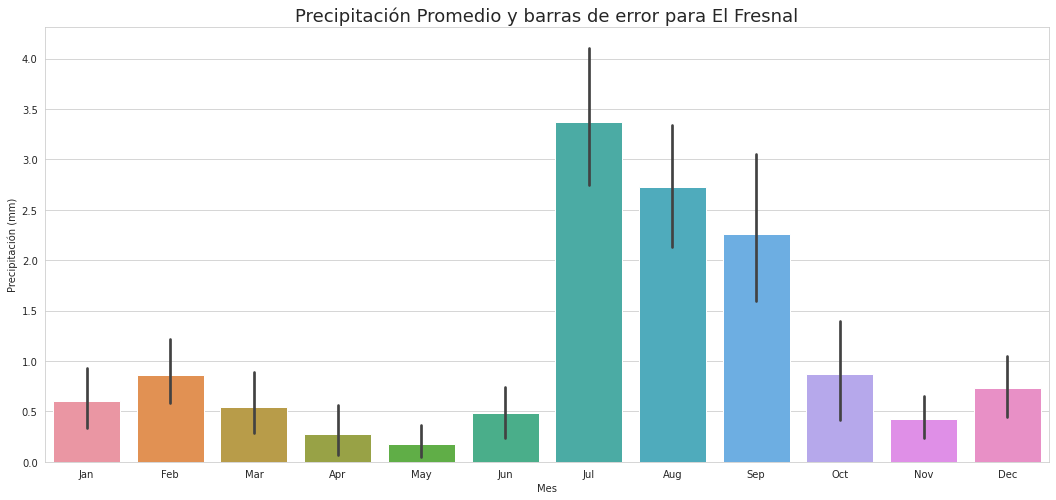

In [81]:
#Esto con ayuda de la función de Seaborn sns.barplot()

#AGRUPAMOS LOS DATOS EN AÑOS
#Seleccionamos un rango de 20 años
df_15 = df_meteo[(df_meteo['Año'] >= 1981) & (df_meteo['Año'] < 1996)]
#Seleccionamos un rango de 20 años
df_35 = df_meteo[(df_meteo['Año'] >= 1996) & (df_meteo['Año'] < 2016)]

#Graficamos la Precipitación de los últimos 20 años
#Agrupada por Año
sns.set_style('whitegrid')
plt.figure(figsize=(18,8))
g35=sns.barplot(x='Año', y='Precip', data=df_35);
#Rotamos 45º los Años en el eje x para mejor lectura
g35.set_xticklabels(g35.get_xticklabels(), rotation=45, horizontalalignment='right');
plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para El Fresnal', fontsize=18)
plt.show()

#AGRUPAMOS LOS DATOS EN MESES 
#Graficamos la Precipitación agrupada por meses de los últimos 20 años
sns.set_style('whitegrid')
plt.figure(figsize=(18,8))
g=sns.barplot(x='Mes', y='Precip', data=df_35);
#Rotamos 45º los Años en el eje x para mejor lectura
g35.set_xticklabels(g35.get_xticklabels(), rotation=45, horizontalalignment='right');
plt.xlabel('Mes')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para El Fresnal', fontsize=18)
plt.show()

* ** **

* **Actividad 5**
> Creamos una colección de los últimos 30 años de datos, utilizando condiciones de filtrado por un rango de años. Creamos las gráficas de línea de las variables Precipitación, Temperaturas Máxima y Mínima como funciones del tiempo



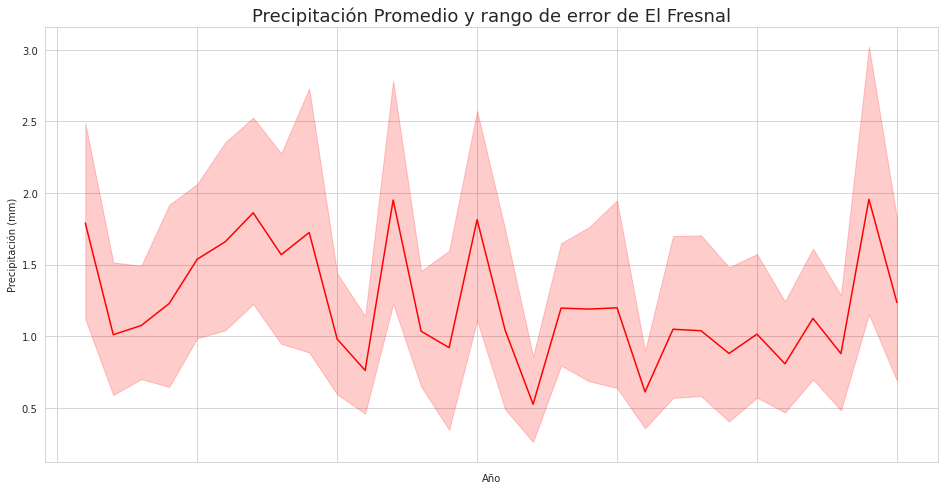

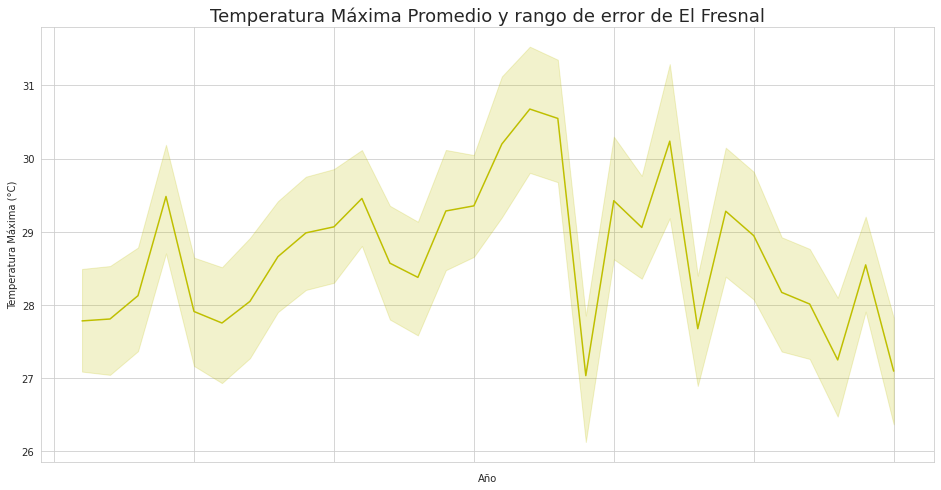

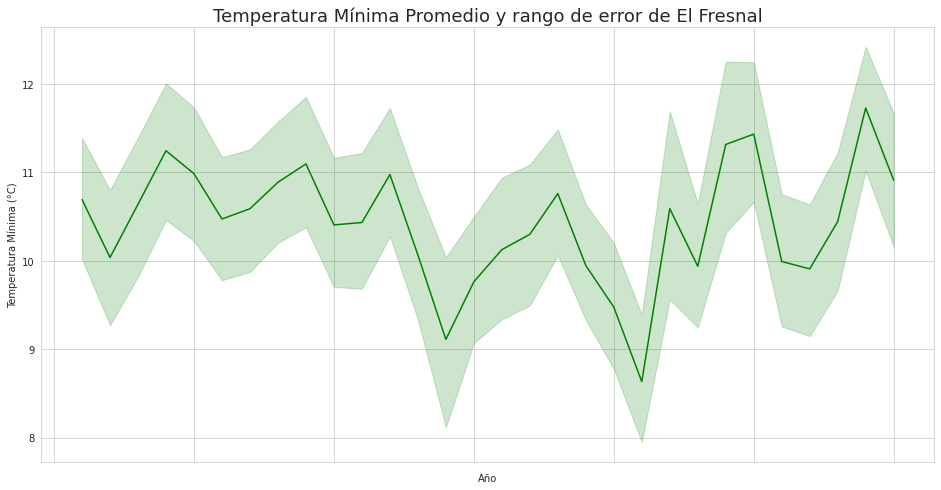

In [84]:
#Las gráficas de línea se realizarán con ayuda de la función de Seaborn sns.lineplot()

#Agrupamos lo últimos 30 años de datos
df_30 = df_meteo[(df_meteo['Año'] >= 1986) & (df_meteo['Año'] < 2016)]

#PRECIPITACIÓN
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
g=sns.lineplot(x='Año', y='Precip', data=df_30,  color='r');
#Rotamos 45º los Años en el eje x para mejor lectura
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');
plt.xlabel('Año')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y rango de error de El Fresnal', fontsize=18)
plt.show()

#TEMPERATURA MÁXIMA
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
g=sns.lineplot(x='Año', y='Tmax', data=df_30,  color='y');
#Rotamos 45° los Años en el eje x para mejor lectura
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');
plt.xlabel('Año')
plt.ylabel('Temperatura Máxima (°C)')
plt.title('Temperatura Máxima Promedio y rango de error de El Fresnal', fontsize=18)
plt.show()

#TEMPERATURA MÍNIMA
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
g=sns.lineplot(x='Año', y='Tmin', data=df_30,  color='g');
#Rotamos 45° los Años en el eje x para mejor lectura
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');
plt.xlabel('Año')
plt.ylabel('Temperatura Mínima (°C)')
plt.title('Temperatura Mínima Promedio y rango de error de El Fresnal', fontsize=18)
plt.show()



* **Actividad 6**
>  Con el conjunto de 30 años de datos, produzca diagramas de cajas para observar la variabilidad de las Temperaturas Máximas y Mínimas, junto con la Evaporación agrupadas por Mes.

 


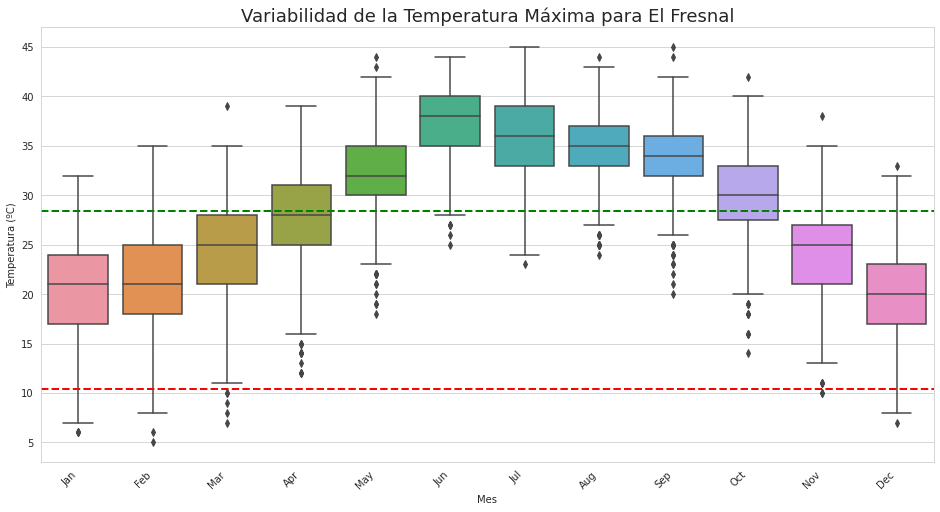

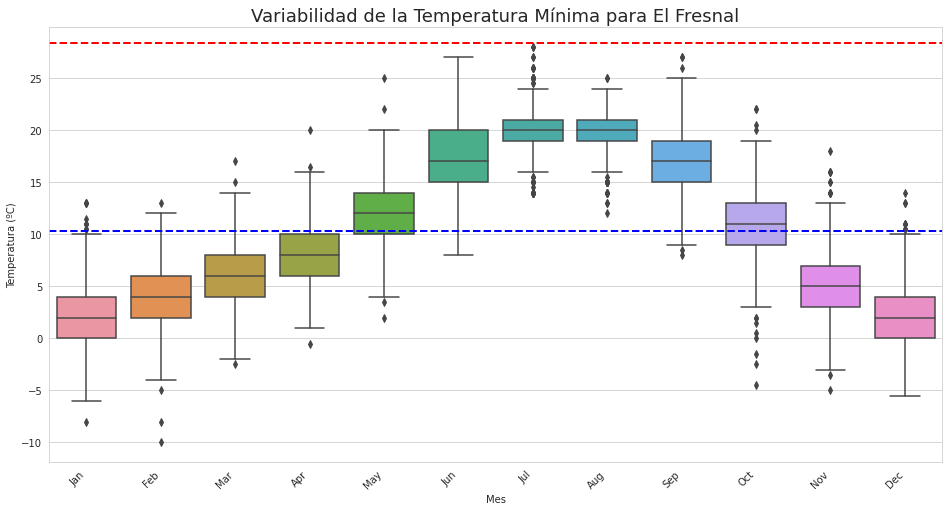

El promedio de la Temperatura Máxima es: 28.382926829268296
El promedio de la Temperatura Mínima es: 10.360906586526422
La diferencia entre los promedios de la Temperatura Máxima y Mínima es: =  18.022020242741874


In [83]:
#Los diagramas de caja se realizarán con ayuda de la función de Seaborn sns.boxplot()
#Recordamos que habíamos agrupado los datos de lo últimos 30 años de datos (realizado anteriormente)

sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

#Promedio de Tmax y Tmin
TmaxProm = df_meteo.Tmax.mean()
TminProm = df_meteo.Tmin.mean()


##TEMPERATURA MÁXIMA
#Realizamos una gráfica de caja de la temperatura máxima
g=sns.boxplot(x='Mes', y='Tmax', data=df_30);

#linea promedio de la temperatura máxima 
plt.axhline(TmaxProm, color = 'g', linestyle='--', linewidth=2);
plt.axhline(TminProm, color = 'r', linestyle='--', linewidth=2);

# Rotamos 45º los Años en el eje x para mejor lectura
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Mes')
plt.ylabel('Temperatura (ºC)')
plt.title('Variabilidad de la Temperatura Máxima para El Fresnal', fontsize=18)
plt.show()



##TEMPERATURA MÍNIMA
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
#Realizamos una gráfica de caja de la temperatura mínima
g=sns.boxplot(x='Mes', y='Tmin', data=df_30);

#linea promedio de la temperatura máxima 
plt.axhline(TmaxProm, color = 'r', linestyle='--', linewidth=2);
plt.axhline(TminProm, color = 'b', linestyle='--', linewidth=2);

# Rotamos 45º los Años en el eje x para mejor lectura
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Mes')
plt.ylabel('Temperatura (ºC)')
plt.title('Variabilidad de la Temperatura Mínima para El Fresnal', fontsize=18)
plt.show()

#Se imprime la información sobre las temperaturas máximas y mínimas 
print('El promedio de la Temperatura Máxima es:', TmaxProm)
print('El promedio de la Temperatura Mínima es:', TminProm)
print('La diferencia entre los promedios de la Temperatura Máxima y Mínima es: = ', (TmaxProm - TminProm))